In [ ]:
# Question 2

# Load the dataset
import pandas as pd
auto = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data', 
                   delim_whitespace = True, header=None, names = ['mpg', 'cyls', 'disp', 'hp', 
                                                                  'weight', 'accel', 'model', 'orig', 'name'])

# Question 2(a)
# Drop the name and origin attributes

auto = auto.drop(['orig', 'name'], axis=1)

# Question 2(b)
# Source: January_24_MBAI5310_In_Class_Exercise_auto_mpg_Decision_Trees_and_PCA_for_release

hp_sum = [0.0]*9; hp_count = [0]*9 #This line creates two lists to hold the sum of hp for each cylinder
for _ in range(auto.shape[0]): #The 0 axis is the number of rows on this dataset. This for loop is to populate hp_sum and hp_count
    if(auto.iloc[_,3]!='?'): #We are only interested on rows that aren't missing the hp value
        hp_sum[auto.iloc[_,1]]=hp_sum[auto.iloc[_,1]]+float(auto.iloc[_,3]) #This line adds up the hp value for the corresponding # of cylinders
        hp_count[auto.iloc[_,1]]+=1 #This line adds the counter for the corresponding number of cylinders
for _ in range(auto.shape[0]): #This for loop fills in the average hp for the corresponding cylinders when hp is missing
    if(auto.iloc[_,3]=='?'):
        auto.iloc[_,3] = hp_sum[auto.iloc[_,1]]/hp_count[auto.iloc[_,1]]

# Question 2(c)
# Source: https://stackoverflow.com/questions/20025882/add-a-string-prefix-to-each-value-in-a-string-column-using-pandas,
# https://stackoverflow.com/questions/39173813/pandas-convert-dtype-object-to-int

auto['model'] = '19' + auto['model'].astype(str) # Add '19' before every year 

auto = auto.astype(float) # Convert data type to float 

# Question 2(d)
# Source: https://www.tensorflow.org/tutorials/keras/regression#split_the_data_into_training_and_test_sets

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

# Split the data set into training and validation sets

train_dataset = auto.sample(frac=0.5, random_state=0)
test_dataset = auto.drop(train_dataset.index)

In [ ]:
# Question 2(e)
# Source: https://www.tensorflow.org/tutorials/keras/regression#split_the_data_into_training_and_test_sets

# We seperate the target value as this is the label that we will train our model to predict.

train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('mpg')
test_labels = test_features.pop('mpg')

# We will add a normalization layer into our model

normalizer = tf.keras.layers.Normalization(axis=-1) # First layer

normalizer.adapt(np.array(train_features)) # We fit the state of the preprocessing layer to the data

# Regression with a deep neural network (DNN)

def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 6)                13        
 ion)                                                            
                                                                 
 dense_3 (Dense)             (None, 64)                448       
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,686
Trainable params: 4,673
Non-trainable params: 13
_________________________________________________________________


In [ ]:
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

#Initialize an empty list
test_results = {}

# Collect the results on the test set in the empty list
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

# We can review the test set's performance
pd.DataFrame(test_results, index=['Mean absolute error [MPG]'])

,dnn_model
Mean absolute error [MPG],2.16464


7/7 [==============================] - 0s 2ms/step


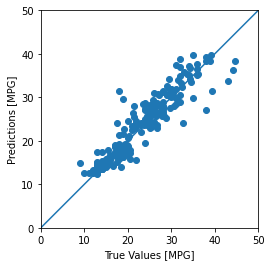

In [ ]:
# We will now make predictions with the dnn_model on the test set using Keras

test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims)

# We see that the predicted values are quite close to the true values of MPG with just a few outliers. 